In [94]:
import pandas as pd

In [87]:
tankpreise = pd.read_csv('https://data.hsbo.de/tankpreise_Bochum_2020.csv')

In [88]:
tankpreise.head()

date                          station_uuid  diesel  \
0  2020-01-01 02:03:03+01  b7dc5a11-661a-419f-8d30-d9763b2897c7   1.289   
1  2020-01-01 04:36:04+01  51d4b638-a095-1aa0-e100-80009459e03a   1.309   
2  2020-01-01 04:36:04+01  51d4b671-a095-1aa0-e100-80009459e03a   1.319   
3  2020-01-01 04:36:04+01  51d4b500-a095-1aa0-e100-80009459e03a   1.319   
4  2020-01-01 04:36:04+01  cd8b8686-d085-1ed7-a59b-163f66bf05c4   1.319   

      e5    e10  dieselchange  e5change  e10change  
0  1.409  1.369             0         0          1  
1  1.429  1.409             1         1          1  
2  1.439  1.399             1         1          1  
3  1.439  1.419             1         1          1  
4  1.439  1.419             1         1          1

In [4]:
tankpreise.describe()

diesel             e5            e10
count  487736.000000  487736.000000  487736.000000
mean        1.095399       1.275508       1.239714
std         0.088784       0.077771       0.083094
min         0.000000       0.000000       0.000000
25%         1.029000       1.228000       1.188000
50%         1.069000       1.259000       1.219000
75%         1.129000       1.319000       1.279000
max         1.489000       1.629000       1.609000

In [5]:
tankpreise.dtypes

date             object
station_uuid     object
diesel          float64
e5              float64
e10             float64
dtype: object

In [93]:
tankpreise['Datum'] = pd.to_datetime(tankpreise['date'] + ":00")

/tmp/ipykernel_1111/3130635898.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  tankpreise['Datum'] = pd.to_datetime(tankpreise['date'] + ":00")


In [9]:
tankpreise.dtypes

date                         object
station_uuid                 object
diesel                      float64
e5                          float64
e10                         float64
Datum           datetime64[ns, UTC]
dtype: object

In [10]:
tankpreise.head()

date station_uuid  diesel     e5    e10  \
0  2020-01-01 02:03:03+01     b7d..7c7   1.289  1.409  1.369   
1  2020-01-01 04:36:04+01     51d..03a   1.309  1.429  1.409   
2  2020-01-01 04:36:04+01     51d..03a   1.319  1.439  1.399   
3  2020-01-01 04:36:04+01     51d..03a   1.319  1.439  1.419   
4  2020-01-01 04:36:04+01     cd8..5c4   1.319  1.439  1.419   

                      Datum  
0 2020-01-01 01:03:03+00:00  
1 2020-01-01 03:36:04+00:00  
2 2020-01-01 03:36:04+00:00  
3 2020-01-01 03:36:04+00:00  
4 2020-01-01 03:36:04+00:00

In [11]:
preiseE5 = tankpreise[['Datum','e5']]

In [44]:
preiseE5.head()

Datum     e5  Wochentag  Monat
0 2020-01-01 01:03:03+00:00  1.409  Wednesday      1
1 2020-01-01 03:36:04+00:00  1.429  Wednesday      1
2 2020-01-01 03:36:04+00:00  1.439  Wednesday      1
3 2020-01-01 03:36:04+00:00  1.439  Wednesday      1
4 2020-01-01 03:36:04+00:00  1.439  Wednesday      1

## Aufgabe 2

Um den Verlauf zu charakterisieren würde man als erstes die Preise z.B. pro Wochentag
berechnen.

  1. Wochentag Spalte hinzufügen
  2. mit Group By Durchschnittspreise nach Wochentag berechnen

In [15]:
preiseE5['Wochentag'] = preiseE5['Datum'].dt.day_name()

/tmp/ipykernel_1111/3209317105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preiseE5['Wochentag'] = preiseE5['Datum'].dt.day_name()


In [16]:
preiseE5.head()

Datum     e5  Wochentag
0 2020-01-01 01:03:03+00:00  1.409  Wednesday
1 2020-01-01 03:36:04+00:00  1.429  Wednesday
2 2020-01-01 03:36:04+00:00  1.439  Wednesday
3 2020-01-01 03:36:04+00:00  1.439  Wednesday
4 2020-01-01 03:36:04+00:00  1.439  Wednesday

In [17]:
preiseWochentag = preiseE5[['Wochentag','e5']]

In [19]:
preiseWochentag.groupby('Wochentag').min()

e5
Wochentag       
Friday     1.069
Monday     0.000
Saturday   1.069
Sunday     1.069
Thursday   1.059
Tuesday    0.000
Wednesday  0.000

In [20]:
preiseWochentag = preiseWochentag[ preiseWochentag['e5'] > 0 ]

In [22]:
preiseWochentag.groupby('Wochentag').mean()

e5
Wochentag          
Friday     1.277120
Monday     1.277774
Saturday   1.269661
Sunday     1.260579
Thursday   1.280508
Tuesday    1.280024
Wednesday  1.279878

In [23]:
preiseE5.head()

Datum     e5  Wochentag
0 2020-01-01 01:03:03+00:00  1.409  Wednesday
1 2020-01-01 03:36:04+00:00  1.429  Wednesday
2 2020-01-01 03:36:04+00:00  1.439  Wednesday
3 2020-01-01 03:36:04+00:00  1.439  Wednesday
4 2020-01-01 03:36:04+00:00  1.439  Wednesday

In [38]:
preiseE5['Monat'] = preiseE5['Datum'].dt.month

/tmp/ipykernel_1111/1321889525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preiseE5['Monat'] = preiseE5['Datum'].dt.month


In [39]:
preiseE5.head()

Datum     e5  Wochentag  Monat
0 2020-01-01 01:03:03+00:00  1.409  Wednesday      1
1 2020-01-01 03:36:04+00:00  1.429  Wednesday      1
2 2020-01-01 03:36:04+00:00  1.439  Wednesday      1
3 2020-01-01 03:36:04+00:00  1.439  Wednesday      1
4 2020-01-01 03:36:04+00:00  1.439  Wednesday      1

In [40]:
nachMonat = preiseE5[['Monat','e5']]

In [41]:
jeMonat = nachMonat.groupby('Monat').mean()

In [43]:
jeMonat.head(14)

e5
Monat          
1      1.400187
2      1.400610
3      1.315823
4      1.205535
5      1.186785
6      1.261453
7      1.280435
8      1.276992
9      1.273902
10     1.256308
11     1.232512
12     1.263433

<Axes: xlabel='Monat'>

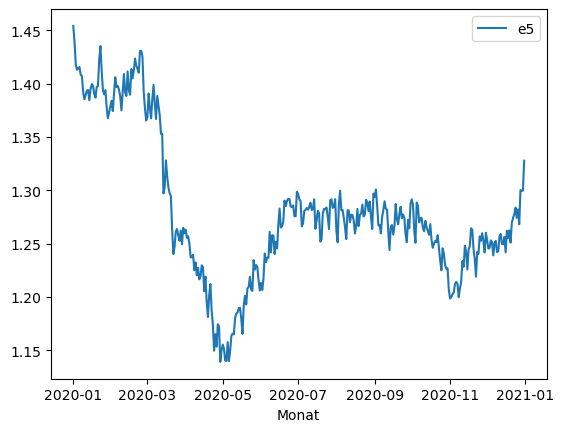

In [37]:
jeMonat.plot()

## Aufgabe 3 - In welchen PLZ Bereich kann man in Bochum am günstigsten tanken?

Idee:

  1. Tankpreise mit Tankstellendaten verbinden
  2. Relevante Spalten herausfiltern
  3. 

In [54]:
tankpreise = pd.read_csv('https://datascience.hs-bochum.de/data/tankpreise/tankpreise-Bochum_2020-01-01_to_2020-12-31.csv')
tankpreise.head()

date                          station_uuid  diesel  \
0  2020-01-01 02:03:03+01  b7dc5a11-661a-419f-8d30-d9763b2897c7   1.289   
1  2020-01-01 04:36:04+01  51d4b638-a095-1aa0-e100-80009459e03a   1.309   
2  2020-01-01 04:36:04+01  51d4b671-a095-1aa0-e100-80009459e03a   1.319   
3  2020-01-01 04:36:04+01  51d4b500-a095-1aa0-e100-80009459e03a   1.319   
4  2020-01-01 04:36:04+01  cd8b8686-d085-1ed7-a59b-163f66bf05c4   1.319   

      e5    e10  dieselchange  e5change  e10change  
0  1.409  1.369             0         0          1  
1  1.429  1.409             1         1          1  
2  1.439  1.399             1         1          1  
3  1.439  1.419             1         1          1  
4  1.439  1.419             1         1          1

In [89]:
tankstellen = pd.read_csv('https://data.hsbo.de/tankstellen.csv')

In [90]:
tankstellen.head()

uuid                  name   brand  \
0  00060723-0001-4444-8888-acdc00000001  BAGeno Raiffeisen eG     NaN   
1  005056ba-7cb6-1ed2-bceb-5332ab168d12     famila Tankstelle  FAMILA   
2  005056ba-7cb6-1ed2-bceb-573c18314d16       star Tankstelle    STAR   
3  005056ba-7cb6-1ed2-bceb-662ba1a94d1f       star Tankstelle    STAR   
4  005056ba-7cb6-1ed2-bceb-6f7b23564d23       star Tankstelle    STAR   

                 street house_number post_code          city   latitude  \
0   Künzelsauer Strasse            7     74653  Ingelfingen   49.296822   
1         Pascalstrasse            9     25442     Quickborn  53.742150   
2       Riehler Strasse          240     50735          Köln  50.961800   
3  BAB 10 / Seeberg Ost          NaN     15345  Altlandsberg  52.550160   
4     Duisburger Straße          130     47166      Duisburg  51.489790   

   longitude  
0   9.661385  
1   9.941240  
2   6.980070  
3  13.682120  
4   6.783730

In [58]:
df = tankpreise.merge(tankstellen, left_on="station_uuid", right_on="uuid")

In [59]:
df.head()

date                          station_uuid  diesel  \
0  2020-01-01 02:03:03+01  b7dc5a11-661a-419f-8d30-d9763b2897c7   1.289   
1  2020-01-01 04:36:04+01  51d4b638-a095-1aa0-e100-80009459e03a   1.309   
2  2020-01-01 04:36:04+01  51d4b671-a095-1aa0-e100-80009459e03a   1.319   
3  2020-01-01 04:36:04+01  51d4b500-a095-1aa0-e100-80009459e03a   1.319   
4  2020-01-01 04:36:04+01  cd8b8686-d085-1ed7-a59b-163f66bf05c4   1.319   

      e5    e10  dieselchange  e5change  e10change  \
0  1.409  1.369             0         0          1   
1  1.429  1.409             1         1          1   
2  1.439  1.399             1         1          1   
3  1.439  1.419             1         1          1   
4  1.439  1.419             1         1          1   

                                   uuid  \
0  b7dc5a11-661a-419f-8d30-d9763b2897c7   
1  51d4b638-a095-1aa0-e100-80009459e03a   
2  51d4b671-a095-1aa0-e100-80009459e03a   
3  51d4b500-a095-1aa0-e100-80009459e03a   
4  cd8b8686-d085-1ed7-a59b-163f66bf05c4   

                                                name  \
0                           Bochum, Wittenerstr. 361   
1  Supermarkt-Tankstelle am real,- Markt BOCHUM O...   
2                       JET BOCHUM WITTENER STR. 110   
3                         JET BOCHUM RIEMKER STR. 11   
4                   JET BOCHUM HATTINGER STRASSE 629   

                                   brand                 street house_number  \
0                                     SB       Wittenerstr. 361          NaN   
1  Supermarkt-Tankstelle am real,- Markt       OTTOSTR. 40 - 43          NaN   
2                                    JET      WITTENER STR. 110          NaN   
3                                    JET        RIEMKER STR. 11          NaN   
4                                    JET  HATTINGER STRASSE 629          NaN   

  post_code    city   latitude  longitude  
0     44803  Bochum  51.472407   7.259509  
1     44867  BOCHUM  51.472200   7.121800  
2     44789  BOCHUM  51.475900   7.233920  
3     44809  BOCHUM  51.507660   7.191170  
4     44879  BOCHUM  51.435008   7.179170

In [60]:
bochum = df[['post_code','e5']]

In [61]:
bochum.head()

post_code     e5
0     44803  1.409
1     44867  1.429
2     44789  1.439
3     44809  1.439
4     44879  1.439

In [68]:
preiseBO_nachPLZ = bochum.groupby('post_code').mean()

In [71]:
preiseBO_nachPLZ.sort_values(by = 'e5')

e5
post_code          
44787      1.257457
44869      1.258886
44879      1.260674
44867      1.266948
44809      1.269947
44892      1.271463
44793      1.271586
44803      1.272313
44791      1.276414
44797      1.276847
44795      1.280254
44894      1.281944
44789      1.285073
44807      1.286237
44799      1.288476
44805      1.294359
44866      1.296658

In [67]:
preiseBO_nachPLZ.idxmax()

e5    44866
dtype: object

## Aufgabe 5: Wie häufig haben Shell/ESSO jeweils die Preise geändert?

In [73]:
df.head()

date                          station_uuid  diesel  \
0  2020-01-01 02:03:03+01  b7dc5a11-661a-419f-8d30-d9763b2897c7   1.289   
1  2020-01-01 04:36:04+01  51d4b638-a095-1aa0-e100-80009459e03a   1.309   
2  2020-01-01 04:36:04+01  51d4b671-a095-1aa0-e100-80009459e03a   1.319   
3  2020-01-01 04:36:04+01  51d4b500-a095-1aa0-e100-80009459e03a   1.319   
4  2020-01-01 04:36:04+01  cd8b8686-d085-1ed7-a59b-163f66bf05c4   1.319   

      e5    e10  dieselchange  e5change  e10change  \
0  1.409  1.369             0         0          1   
1  1.429  1.409             1         1          1   
2  1.439  1.399             1         1          1   
3  1.439  1.419             1         1          1   
4  1.439  1.419             1         1          1   

                                   uuid  \
0  b7dc5a11-661a-419f-8d30-d9763b2897c7   
1  51d4b638-a095-1aa0-e100-80009459e03a   
2  51d4b671-a095-1aa0-e100-80009459e03a   
3  51d4b500-a095-1aa0-e100-80009459e03a   
4  cd8b8686-d085-1ed7-a59b-163f66bf05c4   

                                                name  \
0                           Bochum, Wittenerstr. 361   
1  Supermarkt-Tankstelle am real,- Markt BOCHUM O...   
2                       JET BOCHUM WITTENER STR. 110   
3                         JET BOCHUM RIEMKER STR. 11   
4                   JET BOCHUM HATTINGER STRASSE 629   

                                   brand                 street house_number  \
0                                     SB       Wittenerstr. 361          NaN   
1  Supermarkt-Tankstelle am real,- Markt       OTTOSTR. 40 - 43          NaN   
2                                    JET      WITTENER STR. 110          NaN   
3                                    JET        RIEMKER STR. 11          NaN   
4                                    JET  HATTINGER STRASSE 629          NaN   

  post_code    city   latitude  longitude  
0     44803  Bochum  51.472407   7.259509  
1     44867  BOCHUM  51.472200   7.121800  
2     44789  BOCHUM  51.475900   7.233920  
3     44809  BOCHUM  51.507660   7.191170  
4     44879  BOCHUM  51.435008   7.179170

In [74]:
shell = df[ df['brand'] == 'Shell' ]

In [78]:
shell.shape

(35748, 17)

In [79]:
tankstelleRealmarktBO = df[ df['uuid'] == '51d4b638-a095-1aa0-e100-80009459e03a' ]

In [80]:
tankstelleRealmarktBO.head()

date                          station_uuid  diesel  \
1   2020-01-01 04:36:04+01  51d4b638-a095-1aa0-e100-80009459e03a   1.309   
53  2020-01-01 06:33:03+01  51d4b638-a095-1aa0-e100-80009459e03a   1.389   
76  2020-01-01 07:23:03+01  51d4b638-a095-1aa0-e100-80009459e03a   1.379   
80  2020-01-01 07:37:03+01  51d4b638-a095-1aa0-e100-80009459e03a   1.339   
84  2020-01-01 08:08:04+01  51d4b638-a095-1aa0-e100-80009459e03a   1.329   

       e5    e10  dieselchange  e5change  e10change  \
1   1.429  1.409             1         1          1   
53  1.509  1.489             1         1          1   
76  1.499  1.479             1         1          1   
80  1.459  1.439             1         1          1   
84  1.449  1.429             1         1          1   

                                    uuid  \
1   51d4b638-a095-1aa0-e100-80009459e03a   
53  51d4b638-a095-1aa0-e100-80009459e03a   
76  51d4b638-a095-1aa0-e100-80009459e03a   
80  51d4b638-a095-1aa0-e100-80009459e03a   
84  51d4b638-a095-1aa0-e100-80009459e03a   

                                                 name  \
1   Supermarkt-Tankstelle am real,- Markt BOCHUM O...   
53  Supermarkt-Tankstelle am real,- Markt BOCHUM O...   
76  Supermarkt-Tankstelle am real,- Markt BOCHUM O...   
80  Supermarkt-Tankstelle am real,- Markt BOCHUM O...   
84  Supermarkt-Tankstelle am real,- Markt BOCHUM O...   

                                    brand            street house_number  \
1   Supermarkt-Tankstelle am real,- Markt  OTTOSTR. 40 - 43          NaN   
53  Supermarkt-Tankstelle am real,- Markt  OTTOSTR. 40 - 43          NaN   
76  Supermarkt-Tankstelle am real,- Markt  OTTOSTR. 40 - 43          NaN   
80  Supermarkt-Tankstelle am real,- Markt  OTTOSTR. 40 - 43          NaN   
84  Supermarkt-Tankstelle am real,- Markt  OTTOSTR. 40 - 43          NaN   

   post_code    city  latitude  longitude  
1      44867  BOCHUM   51.4722     7.1218  
53     44867  BOCHUM   51.4722     7.1218  
76     44867  BOCHUM   51.4722     7.1218  
80     44867  BOCHUM   51.4722     7.1218  
84     44867  BOCHUM   51.4722     7.1218

In [76]:
df['brand'].unique()

array(['SB', 'Supermarkt-Tankstelle am real,- Markt', 'JET', 'TinQ',
       'Shell', 'ESSO', 'ARAL', 'Westfalen', 'TOTAL', 'Access', 'Markant',
       'Classic Tankstelle', 'STAR', 'Freie Tankstelle', 'OIL!', 'HEM',
       'GO', 'BFT Tankhof Stein'], dtype=object)

In [77]:
tankstellen['brand'].unique()

array([nan, 'FAMILA', 'STAR', 'ARAL', 'Freie', 'AVIA', 'Shell', 'M1',
       'Westfalen', 'ESSO', 'TOTAL', 'Markant', 'AVIA Xpress',
       'TANKHOF STEINHEIM', 'Raiffeisen', 'OMV', 'Zahradnik', 'TEC',
       'Schillhorn Mineralöle GmbH Hemme', 'SB', 'BayWa',
       'Schillhorn Mineralöle GmbH Hanerau', 'ELAN', 'V-Markt Schongau',
       'bft', 'Tankstelle Teuchern', 'Heinrich Albers OHG', 'Tankpoint',
       'Tankstelle', 'JET', 'Raiffeisen Tankstelle', 'BFT', 'OIL!',
       'Frei', 'SHELL', 'Sauerwald', 'CLASSIC', 'Mandler Tank & Wasch',
       'Q1', 'Freie Tankstelle', 'PM', 'Mengin',
       'Tankstelle Kassner GmbH', 'Sunoil', 'EC - Tankstelle Rolfes',
       'Nuttelmann Tankservice', 'Agip', 'Roth- Station', 'Hoyer',
       'Eberhardt Unteröwisheim', 'BUNTE MINERALÖLHANDEL GMBH',
       'Freie Tankstelle AH Holste', 'ED', 'Calpam', 'team', 'Greenline',
       'Tankpool24', 'TAMOIL', 'HEM', 'bft - Walther', 'freie Tankstelle',
       'RAN', 'Kaiser/Freie-24h-Tankstelle', 'Sigmund H